# Turnover Rate HR Consultant
In this notebook, I design a detector which can pick up employees who are likely to resign, and an HR consultant which can give advice to reduce the possibility of resigning according to the model.

### Load Library

In [1]:
library('tidyverse')
library('ggplot2')
library('ggpubr')

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
df = read.csv('C:/Users/Max/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv', encoding = 'utf-8')
df = rename(df, 'Age' = '锘緼ge')

In [3]:
df = as.data.frame(unclass(df), stringsAsFactors = T)
df %>% head(n=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5


### Reorder  the Variables

In [4]:
df = (df %>% select(c('Attrition','Age', 'Gender', 'Education', 'EducationField', 'MaritalStatus',#Demographic Characteristics
 'NumCompaniesWorked', #Experience
 'Department', 'JobLevel', 'JobRole', #Job
 'HourlyRate', 'DailyRate', 'MonthlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel', #Incentive
 'BusinessTravel', 'OverTime', 'WorkLifeBalance', 'DistanceFromHome',#Working Environment
 'PerformanceRating', 'JobInvolvement',#Performance
 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction',#Satisfaction
 'TrainingTimesLastYear', #Investment in Human Capital
 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager')))#Working Years


### Some Histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



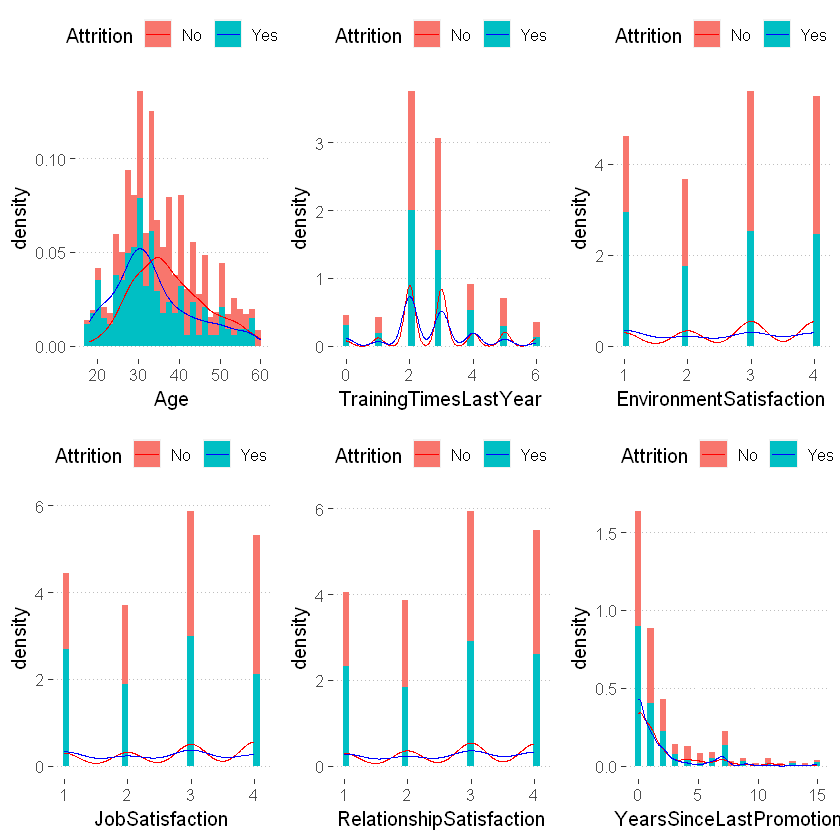

In [5]:
plot_Age = ggplot(data = df, aes(x = Age, fill = Attrition))+
    geom_histogram(aes(y = ..density..))+
    geom_line(aes(y = ..density.., color = Attrition), stat = 'density')+                                            
    scale_colour_manual(name = 'Attrition', values = c('red', 'blue'))+
    theme_pubclean()

plot_TrainingTimesLastYear = ggplot(data = df, aes(x = TrainingTimesLastYear, fill = Attrition))+
    geom_histogram(aes(y = ..density..))+
    geom_line(aes(y = ..density.., color = Attrition), stat = 'density')+                                            
    scale_colour_manual(name = 'Attrition', values = c('red', 'blue'))+
    theme_pubclean()

plot_EnvironmentSatisfaction = ggplot(data = df, aes(x = EnvironmentSatisfaction, fill = Attrition))+
    geom_histogram(aes(y = ..density..))+
    geom_line(aes(y = ..density.., color = Attrition), stat = 'density')+                                            
    scale_colour_manual(name = 'Attrition', values = c('red', 'blue'))+
    theme_pubclean()

plot_JobSatisfaction = ggplot(data = df, aes(x = JobSatisfaction, fill = Attrition))+
    geom_histogram(aes(y = ..density..))+
    geom_line(aes(y = ..density.., color = Attrition), stat = 'density')+                                            
    scale_colour_manual(name = 'Attrition', values = c('red', 'blue'))+
    theme_pubclean()

plot_RelationshipSatisfaction = ggplot(data = df, aes(x = RelationshipSatisfaction, fill = Attrition))+
    geom_histogram(aes(y = ..density..))+
    geom_line(aes(y = ..density.., color = Attrition), stat = 'density')+                                            
    scale_colour_manual(name = 'Attrition', values = c('red', 'blue'))+
    theme_pubclean()

plot_YearsSinceLastPromotion = ggplot(data = df, aes(x = YearsSinceLastPromotion, fill = Attrition))+
    geom_histogram(aes(y = ..density..))+
    geom_line(aes(y = ..density.., color = Attrition), stat = 'density')+                                            
    scale_colour_manual(name = 'Attrition', values = c('red', 'blue'))+
    theme_pubclean()



ggarrange(plot_Age,
          plot_TrainingTimesLastYear,
          plot_EnvironmentSatisfaction,
          plot_JobSatisfaction,
          plot_RelationshipSatisfaction,
          plot_YearsSinceLastPromotion)

### Logistic Regression

In [6]:
loglm <- glm(Attrition ~ ., data = df, family = binomial)

In [7]:
library('MASS')


载入程辑包：'MASS'


The following object is masked from 'package:dplyr':

    select




### Model Selection: Stepwise Regression

In [8]:
summary(stepwise_model <- stepAIC(loglm, direction = 'both', trace = FALSE))


Call:
glm(formula = Attrition ~ Age + Gender + EducationField + MaritalStatus + 
    NumCompaniesWorked + JobRole + StockOptionLevel + BusinessTravel + 
    OverTime + WorkLifeBalance + DistanceFromHome + JobInvolvement + 
    EnvironmentSatisfaction + JobSatisfaction + RelationshipSatisfaction + 
    TrainingTimesLastYear + TotalWorkingYears + YearsAtCompany + 
    YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager, 
    family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6970  -0.4941  -0.2543  -0.0932   3.4060  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      1.98043    1.16964   1.693 0.090417 .  
Age                             -0.03179    0.01338  -2.375 0.017530 *  
GenderMale                       0.38159    0.18358   2.079 0.037652 *  
EducationFieldLife Sciences     -0.62920    0.75357  -0.835 0.403740    
EducationFieldMarketing         

### Model Selection: Select Interaction Terms

In [9]:
select_interactiave_pair <- function(left_var, right_var, data = df, threshold){
    base_formula = as.formula(paste('Attrition~', paste(right_var, collapse = '+')))
    base_aic = glm(base_formula, data, family = binomial)$aic
    
    aic_collection = c()
    for (var in right_var){
        formula = as.formula(paste('Attrition~', paste(right_var, collapse = '+'), '+',left_var, '*',var))
        aic_tmp = glm(formula, data, family = binomial)$aic
        aic_collection = append(aic_collection, aic_tmp)    
    }
    add_right_var = right_var[which(aic_collection == min(aic_collection))]
    right_var = append(right_var, paste(left_var, '*', add_right_var))
    
    if (base_aic - min(aic_collection) < threshold){
        print('Done')
        break
    }
    print(paste(left_var, '*', add_right_var))

    return (select_interactiave_pair(left_var, right_var, data = df, threshold))
}

### Final Logistic Model with Small AIC

In [10]:
selected_var = c('Age', 'Gender', 'MaritalStatus', 'NumCompaniesWorked', 
    'JobRole', 'StockOptionLevel', 'BusinessTravel', 'OverTime', 
    'WorkLifeBalance','DistanceFromHome', 'JobInvolvement', 'EnvironmentSatisfaction', 
    'JobSatisfaction', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 
    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
    'YearsSinceLastPromotion', 'YearsWithCurrManager','Age*YearsAtCompany',
    'Age*StockOptionLevel','Age*OverTime','Age*JobSatisfaction',"Age * YearsSinceLastPromotion",
                "Gender * NumCompaniesWorked", "Gender * TrainingTimesLastYear",
                        "Gender * Age*JobSatisfaction", "Gender * YearsAtCompany")

interactive_fm = as.formula(paste('Attrition ~ ', paste(selected_var, collapse = '+'), '+',
                      'Age*YearsAtCompany+','Age*StockOptionLevel+',
                      'Age*OverTime+','Age*JobSatisfaction+',"Age * YearsSinceLastPromotion+",
                        "Gender * NumCompaniesWorked+", "Gender * TrainingTimesLastYear+",
                        "Gender * Age*JobSatisfaction+", "Gender * YearsAtCompany+",
                         "MaritalStatus * YearsWithCurrManager+","MaritalStatus * TrainingTimesLastYear"))
                            
interactive_model <- glm(interactive_fm, data = df, family = binomial)

In [11]:
stepwise_interactive_fm <- stepAIC(interactive_model, data = df, family = binomial)

Start:  AIC=894.06
Attrition ~ Age + Gender + MaritalStatus + NumCompaniesWorked + 
    JobRole + StockOptionLevel + BusinessTravel + OverTime + 
    WorkLifeBalance + DistanceFromHome + JobInvolvement + EnvironmentSatisfaction + 
    JobSatisfaction + RelationshipSatisfaction + TrainingTimesLastYear + 
    TotalWorkingYears + YearsAtCompany + YearsInCurrentRole + 
    YearsSinceLastPromotion + YearsWithCurrManager + Age * YearsAtCompany + 
    Age * StockOptionLevel + Age * OverTime + Age * JobSatisfaction + 
    Age * YearsSinceLastPromotion + Gender * NumCompaniesWorked + 
    Gender * TrainingTimesLastYear + Gender * Age * JobSatisfaction + 
    Gender * YearsAtCompany + Age * YearsAtCompany + Age * StockOptionLevel + 
    Age * OverTime + Age * JobSatisfaction + Age * YearsSinceLastPromotion + 
    Gender * NumCompaniesWorked + Gender * TrainingTimesLastYear + 
    Gender * Age * JobSatisfaction + Gender * YearsAtCompany + 
    MaritalStatus * YearsWithCurrManager + MaritalStatus 

In [14]:
summary(stepwise_interactive_fm <- glm(stepwise_interactive_fm$formula, df,family = 'binomial'))


Call:
glm(formula = stepwise_interactive_fm$formula, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9869  -0.4538  -0.2286  -0.0750   3.3515  

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                                10.843610   2.099056   5.166
Age                                        -0.226619   0.050306  -4.505
GenderMale                                 -7.028352   2.120193  -3.315
MaritalStatusMarried                       -1.854836   0.702754  -2.639
MaritalStatusSingle                        -0.016272   0.740019  -0.022
NumCompaniesWorked                          0.115291   0.063148   1.826
JobRoleHuman Resources                      1.887646   0.599374   3.149
JobRoleLaboratory Technician                1.678522   0.473948   3.542
JobRoleManager                              0.470987   0.693455   0.679
JobRoleManufacturing Director               0.650839   0.556

### Develop an HR Consultant
Compared with LogisticRegressionClassifier, DecisionTreeClassifier performs better in picking up attrition. Therefore, I use Decision Tree as the predictor to monitor who is more likely to resign, and use logistic model to guess the possible reasons for him/her to resign. With a guess from logistic model, HR can do something accordingly.

In [16]:
df = read.csv('C:/Users/Max/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv', encoding = 'utf-8')
df = rename(df, 'Age' = '锘緼ge')
df = as.data.frame(unclass(df), stringsAsFactors = T)

df$MaritalStatusSingle = (df$MaritalStatus == 'Single')
df$JobRoleHR = (df$JobRole == 'Human Resources')
df$JobRoleLab = (df$JobRole == 'Laboratory Technician')
df$JobRoleSE = (df$JobRole == 'Sales Executive')
df$JobRoleSP = (df$JobRole == 'Sales Representative')
df$BusinessTravelFre = (df$BusinessTravel == 'Travel_Frequently')
df$BusinessTravelRar = (df$BusinessTravel == 'Travel_Rarely')
df$OverTimeYes = (df$OverTime == 'Yes')

df_train = df[70:1470,]
df_test = df[1:70, ]

In [17]:
library(rpart)

Warning message:
"程辑包'rpart'是用R版本4.1.2 来建造的"


#### Train a Decision Tree Classifier

In [18]:
decision_tree_classifier = rpart(stepwise_model$formula, df_train, parms = list(prior = c(0.72,0.28), split = 'information'))
which(as.numeric(predict(decision_tree_classifier, df_test, type = 'class')) == 2)

[1]  1  3  4  7  8 12 15 18 20 27 35 37 38 41 42 43 49 50 51 52 55 58 70

#### Ask the classifier to return employees who are likely to resign 

In [19]:
Member_of_Interest <- function(df_test){
 decision_tree_classifier = rpart(stepwise_model$formula, df_train, parms = list(prior = c(0.72,0.28), split = 'information'))   
 idx = c(which(as.numeric(predict(decision_tree_classifier, df_test, type = 'class')) == 2))
return (idx)
}

`Difficulty Index:` I create a index for measuring how difficult it is to reduce the possibility of a member resigning by doing something with repesct to some aspects. The index is defined as:$D = P(S > s_{emp}) = \frac{\Sigma^{|df_{train}|}_{1}I(s_i > s_{emp})}{|df_{train}|}$, where $s_{emp}$ is the state of the employee, $|df_{train}|$ is the number of observations in training set.

I use the index $D * （e^{\beta}-1）$ as the final index, referred with which I give advice.

In [20]:
HR_Consultant <- function(df_test, idx, n=5){
    variable_features = c('StockOptionLevel', 
    'WorkLifeBalance', 'JobInvolvement', 'EnvironmentSatisfaction', 
    'JobSatisfaction', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 
    'YearsSinceLastPromotion')
member = df_test[idx,]

    
difficulty <- function(member){
    diff = c()
    for (i in c(1:length(variable_features))){
        diff = append(diff, mean(df_train[variable_features[i]] > df_test[[variable_features[i]]]))
    }
return(diff)
}
    
    
    advice = c('StockOptionLevel' = 'You should increase stock option level.',
          'TrainingTimesLastYear' = 'You should invest more in training.',
          'WorkLifeBalance' = 'You shold help the member better balance work and life.',
          'EnvironmentSatisfaction' = 'You shoud consider more about his/her working environment.',
          'RelationshipSatisfaction' = 'He/She may have some problem in relationship.',
          'JobInvolvement' = 'You shoud consider more about his/her job involvement.',
          'JobSatisfaction' = 'Maybe you should talk with the member about the overal job satisfaction.',
          'YearsSinceLastPromotion' = 'You should think about promoting.')
    
    na = names((sort(abs(difficulty(member) * exp(stepwise_interactive_fm$coefficients[variable_features])-1), decreasing = T)))[1:n]
    i = 1
    for (name in na){
    
        print(paste('Suggestion',as.character(i),':', as.character(advice[name])))
        i = i + 1
    }
}

In [21]:
Member_of_Interest(df_test)

[1]  1  3  4  7  8 12 15 18 20 27 35 37 38 41 42 43 49 50 51 52 55 58 70

In [22]:
HR_Consultant(df_test,1, n=5)

[1] "Suggestion 1 : Maybe you should talk with the member about the overal job satisfaction."
[1] "Suggestion 2 : You should increase stock option level."
[1] "Suggestion 3 : You shoud consider more about his/her job involvement."
[1] "Suggestion 4 : You should invest more in training."
[1] "Suggestion 5 : He/She may have some problem in relationship."
